# ASTROPI CSV ANALYSIS

This notebook analyses csv data received from the ISS through the pandas library

We import csv file data

In [4]:
import pandas as pd
from IPython.display import display

prova = pd.read_csv('HeaderLog.csv') #dataset creation

display(prova)

,Date/time,x,y,z,Total g,Elevation (Km),g ValorMedio,MotionDetected,Fastmode,FastmodeCounter
0,19:57:14:422517,0.020252,0.030744,0.014152,0.039441,421.756310,0.03944865100063209,False,False,0
1,19:57:14:660847,0.019520,0.031232,0.012688,0.038955,421.759487,0.039360807919806576,False,False,0
2,19:57:14:899534,0.019520,0.030988,0.015372,0.039719,421.762669,0.03933148327459286,False,False,0
3,19:57:15:137869,0.020984,0.030988,0.014152,0.040011,421.765848,0.039440552869117816,False,False,0
4,19:57:15:376665,0.019276,0.029768,0.011956,0.037425,421.769035,0.039110119704977034,False,False,0
...,...,...,...,...,...,...,...,...,...,...
50803,22:54:11:680660,0.021228,0.031232,0.014884,0.040591,418.041024,0.039541066724478324,False,False,0
50804,22:54:11:921103,0.020984,0.030500,0.013908,0.039548,418.041199,0.03986316232590582,False,False,0
50805,22:54:12:170192,0.019520,0.030012,0.014884,0.038772,418.041381,0.03973221236937731,False,False,0
50806,22:54:12:410667,0.018056,0.029524,0.013664,0.037207,418.041559,0.03927215977934761,False,False,0


In [5]:

prova.describe().T


,count,mean,std,min,25%,50%,75%,max
x,50808.0,0.019922,0.001699,-0.047580,0.019276,0.020008,0.020496,0.111020
y,50808.0,0.031141,0.000816,0.021960,0.030744,0.031232,0.031720,0.065148
z,50808.0,0.013901,0.001642,-0.081252,0.013176,0.013908,0.014640,0.094672
Total g,50808.0,0.039552,0.001317,0.030580,0.038958,0.039523,0.040095,0.129499
Elevation (Km),50808.0,422.820676,7.235707,413.275397,418.040997,420.210519,429.034662,436.330827
FastmodeCounter,50808.0,0.025094,0.918822,0.000000,0.000000,0.000000,0.000000,50.000000


In [11]:
prova.memory_usage(index=True, deep=True)

Index                  128
Date/time          3658176
x                   406464
y                   406464
z                   406464
Total g             406464
Elevation (Km)      406464
g ValorMedio       3873064
MotionDetected       50808
Fastmode             50808
FastmodeCounter     406464
dtype: int64

Now we estract only the peaks from the entire sample file through the pandas library, in order to analyse thei duration and their intensity

0.1294989598548432
0.039552140044214014


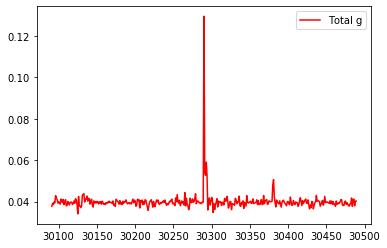

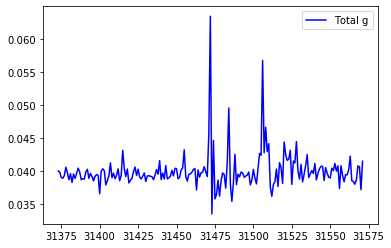

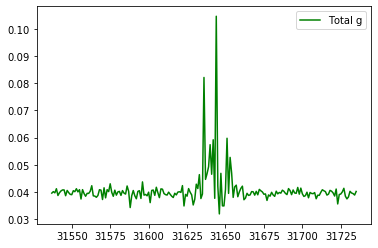

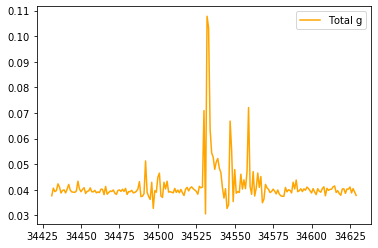

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

#prova[['Date/time','Total g']]
prova = pd.read_csv('HeaderLog.csv')
#prova['Total g']=prova['Total g'].transform(lambda y: y*8.59)   #accelerometer gives values in g;we moltiplied
#for g value at ISS altitude

#print(prova['Total g'])
meanValue = prova['Total g'].mean()
maxValue = prova['Total g'].max()

#meanValue = h.mean()
#maxValue = h.max()
#indexPeaks=prova.index[prova['Total g'] > (meanValue+0.021)].tolist()

#searching for g peaks
indexPeaks=prova.index[prova['Total g'] > (meanValue+0.021)].tolist()
print(maxValue)
print(meanValue)
#print(indexPeaks)
#print(type(indexPeaks))

j=1
i=0
indexPeaksExtended=[]
indexPeaksExtended1=[]
indexPeaksExtended2=[]
indexPeaksExtended3=[]
indexPeaksExtended4=[]
indexPeaksExtended5=[]


#we list the peaks
indexPeaksExtended.append(indexPeaks[0])#indexPeaks.copy()
#print(indexPeaksExtended)

#we take 200 samples before the peak and 200 after the peak
for i in range(1):#(len(indexPeaks)):
    #print(indexPeaks[i])
    for j in range(200):  
        indexPeaksExtended.append(indexPeaks[i]-j)
        indexPeaksExtended.append(indexPeaks[i]+j)
        
indexPeaksExtended.sort()
indexPeaksExtended = list(set(indexPeaksExtended))
#print(indexPeaksExtended)  
#prova.reset_index(inplace=True)
#prova[['Date/time','Total g']]
#prova.drop_duplicates(inplace=True)

#we plot the peaks


"""with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
    print(prova.iloc[indexPeaksExtended,[0,4,7,8]])"""

prova.iloc[indexPeaksExtended,[0,4,7,8]].plot(kind='line', color='red')

indexPeaksExtended1.append(indexPeaks[1])
j=1
for j in range(100):
    indexPeaksExtended1.append(indexPeaks[1]-j)
    indexPeaksExtended1.append(indexPeaks[1]+j)
indexPeaksExtended1.sort()
indexPeaksExtended1 = list(set(indexPeaksExtended1))
#print(prova.iloc[indexPeaksExtended1,[0,4,7,8]])
"""with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
    print(prova.iloc[indexPeaksExtended1,[0,4,7,8]])"""
#print(prova.iloc[indexPeaksExtended1,[4]].mean())
prova.iloc[indexPeaksExtended1,[0,4]].plot(kind='line', color='blue')

indexPeaksExtended2.append(indexPeaks[2])
j=1
for j in range(100):
    indexPeaksExtended2.append(indexPeaks[2]-j)
    indexPeaksExtended2.append(indexPeaks[2]+j)
indexPeaksExtended2.sort()
indexPeaksExtended2 = list(set(indexPeaksExtended2))
#print(prova.iloc[indexPeaksExtended2,[0,4,7,8]])
"""with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
   print(prova.iloc[indexPeaksExtended2,[0,4,7,8]])"""
#print(prova.iloc[indexPeaksExtended1,[4]].mean())
prova.iloc[indexPeaksExtended2,[0,4]].plot(kind='line', color='green')

indexPeaksExtended3.append(indexPeaks[4])
j=1
for j in range(100):
    indexPeaksExtended3.append(indexPeaks[4]-j)
    indexPeaksExtended3.append(indexPeaks[4]+j)
indexPeaksExtended3.sort()
indexPeaksExtended3 = list(set(indexPeaksExtended3))
#print(prova.iloc[indexPeaksExtended3,[0,4,7,8]])
"""with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
    print(prova.iloc[indexPeaksExtended3,[0,4,7,8]])"""
#print(prova.iloc[indexPeaksExtended1,[4]].mean())
prova.iloc[indexPeaksExtended3,[0,4]].plot(kind='line', color='orange')

we notice that the peaks are very short as the duration (one sample every 240ms in Normal mode sample; only the red trace case generated e fast mode sampling); the max value is 0.129g, so they seem to be  vibration shots, we exclude a reboost phase of the ISS. 